<a href="https://colab.research.google.com/github/ITU-Business-Analytics-Team/Business_Analytics_for_Professionals/blob/main/Part%20I%20%3A%20Methods%20%26%20Technologies%20for%20Business%20Analytics/Chapter%203%3A%20Prediction%20Modelling/3_7_Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction Modelling: Machine Learning**
## Decision Trees

[Dataset](https://www.kaggle.com/blastchar/telco-customer-churn): from Kaggle

In [ ]:
#Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
%matplotlib inline

### **Data Preparation**
The following actions were taken to prepare the dataset for the decision tree model. \\
1.1 Understanding data (columns and column data types, missing values, and so 

1.   Understanding data (columns and column data types, missing values, and so forth.)
2.   **Assessing and cleaning the data**: Each column is examined for missing data and nan values, and necessary actions are done.
3. Prior to implementing the decision tree model, simple data exploration is performed.

In [ ]:
#Import Data
url="https://drive.google.com/file/d/1-wVEyWn1Jtu32hfKgZcT_DEaZABSGykw/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data = pd.read_csv(path)
data.head()

,CustomerID,Gender,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,7590-VHVEG,0,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,1,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,1,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,1,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,0,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data['CustomerID'].value_counts()

7590-VHVEG    1
2979-SXESE    1
6992-TKNYO    1
9708-HPXWZ    1
2674-MLXMN    1
             ..
4021-RQSNY    1
6635-CPNUN    1
5159-YFPKQ    1
7101-HRBLJ    1
0742-NXBGR    1
Name: CustomerID, Length: 6499, dtype: int64

In [ ]:
#Checking nonvalues
data[data.isnull().any(axis=1)].count()

CustomerID           9
Gender               9
Senior Citizen       9
Partner              9
Dependents           9
Tenure               9
Phone Service        9
Multiple Lines       9
Internet Service     9
Online Security      9
Online Backup        9
Device Protection    9
Tech Support         9
Streaming TV         9
Streaming Movies     9
Contract             9
Paperless Billing    9
Payment Method       9
Monthly Charges      9
Total Charges        0
Churn                9
dtype: int64

In [ ]:
#removing nan values
data = data.dropna(how='any',axis=0)

In [ ]:
#Checking nonvalues
data[data.isnull().any(axis=1)].count()

CustomerID           0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure               0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn                0
dtype: int64

In [ ]:
data.head()

,CustomerID,Gender,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,7590-VHVEG,0,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,1,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,1,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,1,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,0,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#Counting the number of unique values for categorical variables
print('Number of partners:',data['Partner'].nunique())
print('Number of dependents', data['Dependents'].nunique())
print('Number of phone service', data['Phone Service'].nunique())
print('Number of multiple lines', data['Multiple Lines'].nunique())
print('Number of internet service',data['Internet Service'].nunique())
print('Number of payment method',data['Payment Method'].nunique())
print('Number of tech support', data['Tech Support'].nunique())
print('Number of online security', data['Online Security'].nunique())
print('Number of streaming TV', data['Streaming TV'].nunique())
print('Number of online backup',data['Online Backup'].nunique())
print('Number of online security',data['Online Security'].nunique())
print('Number of contract', data['Contract'].nunique())
print('Number of paperless billing',data['Paperless Billing'].nunique())
print('Number of streaming movies',data['Streaming Movies'].nunique())
print('Number of device protection',data['Device Protection'].nunique())

Number of partners: 2
Number of dependents 2
Number of phone service 2
Number of multiple lines 3
Number of internet service 3
Number of payment method 4
Number of tech support 3
Number of online security 3
Number of streaming TV 3
Number of online backup 3
Number of online security 3
Number of contract 3
Number of paperless billing 2
Number of streaming movies 3
Number of device protection 3


In [ ]:
#Copying original data into anonther variable
data_copy = data.copy()
data_copy.head()

,CustomerID,Gender,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,7590-VHVEG,0,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,1,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,1,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,1,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,0,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#Converting binary variables into numerical values
data_copy['Partner_cat'] = data_copy['Partner'].map({'Yes':1, 'No':0})
data_copy.drop('Partner',axis=1, inplace=True)
data_copy['Dependents_cat'] = data_copy['Dependents'].map({'Yes':1, 'No':0})
data_copy.drop('Dependents',axis=1, inplace=True)
data_copy['Phone Service_cat'] = data_copy['Phone Service'].map({'Yes':1, 'No':0})
data_copy.drop('Phone Service',axis=1, inplace=True)
data_copy['Paperless Billing_cat'] = data_copy['Paperless Billing'].map({'Yes':1, 'No':0})
data_copy.drop('Paperless Billing',axis=1, inplace=True)
data_copy['Churn_cat'] = data_copy['Churn'].map({'Yes':1, 'No':0})
data_copy.drop('Churn', axis=1, inplace=True)
data_copy.head()

,CustomerID,Gender,Senior Citizen,Tenure,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,...,Streaming Movies,Contract,Payment Method,Monthly Charges,Total Charges,Partner_cat,Dependents_cat,Phone Service_cat,Paperless Billing_cat,Churn_cat
0,7590-VHVEG,0,0,1,No phone service,DSL,No,Yes,No,No,...,No,Month-to-month,Electronic check,29.85,29.85,1,0,0,1,0
1,5575-GNVDE,1,0,34,No,DSL,Yes,No,Yes,No,...,No,One year,Mailed check,56.95,1889.50,0,0,1,0,0
2,3668-QPYBK,1,0,2,No,DSL,Yes,Yes,No,No,...,No,Month-to-month,Mailed check,53.85,108.15,0,0,1,1,1
3,7795-CFOCW,1,0,45,No phone service,DSL,Yes,No,Yes,Yes,...,No,One year,Bank transfer (automatic),42.30,1840.75,0,0,0,0,0
4,9237-HQITU,0,0,2,No,Fiber optic,No,No,No,No,...,No,Month-to-month,Electronic check,70.70,151.65,0,0,1,1,1


In [ ]:
#Converting categorical variables into numerical values

data_copy = pd.get_dummies(data_copy,columns=['Multiple Lines','Internet Service','Online Security', 'Online Backup', 'Device Protection', 'Tech Support','Streaming TV', 'Streaming Movies','Contract', 'Payment Method'], prefix=['Multiple Lines','Internet Service','Online Security', 'Online Backup', 'Device Protection', 'Tech Support','Streaming TV', 'Streaming Movies','Contract', 'Payment Method'])

In [ ]:
data_copy.head()

,CustomerID,Gender,Senior Citizen,Tenure,Monthly Charges,Total Charges,Partner_cat,Dependents_cat,Phone Service_cat,Paperless Billing_cat,...,Streaming Movies_No,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,7590-VHVEG,0,0,1,29.85,29.85,1,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,1,0,34,56.95,1889.50,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,1,0,2,53.85,108.15,0,0,1,1,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,1,0,45,42.30,1840.75,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,2,70.70,151.65,0,0,1,1,...,1,0,0,1,0,0,0,0,1,0


In [ ]:
data_copy.corr()
#No high correlation between features

,Gender,Senior Citizen,Tenure,Monthly Charges,Total Charges,Partner_cat,Dependents_cat,Phone Service_cat,Paperless Billing_cat,Churn_cat,...,Streaming Movies_No,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
Gender,1.000000,0.001245,0.009294,-0.011650,0.003193,0.004747,0.008504,-0.010245,-0.014184,-0.010533,...,0.004899,0.002442,-0.006979,-0.007460,0.009955,-0.000791,-0.010634,0.000629,-0.002250,0.012413
Senior Citizen,0.001245,1.000000,0.014948,0.219750,0.102562,0.019537,-0.204482,0.006769,0.157205,0.147644,...,0.033838,-0.183351,0.121454,0.138601,-0.048042,-0.115689,-0.015999,-0.026972,0.172282,-0.151791
Tenure,0.009294,0.014948,1.000000,0.247724,0.825554,0.387343,0.168077,0.007200,0.005378,-0.353256,...,-0.253169,-0.038647,0.286491,-0.652119,0.198611,0.570437,0.244829,0.233232,-0.211140,-0.232872
Monthly Charges,-0.011650,0.219750,0.247724,1.000000,0.651688,0.098307,-0.110802,0.243266,0.352657,0.192302,...,0.019971,-0.765977,0.629060,0.057796,-0.001169,-0.066206,0.040537,0.032598,0.273621,-0.380254
Total Charges,0.003193,0.102562,0.825554,0.651688,1.000000,0.323273,0.068104,0.110572,0.158283,-0.198990,...,-0.201906,-0.376709,0.521579,-0.449560,0.165539,0.365995,0.186274,0.183882,-0.060616,-0.296169
Partner_cat,0.004747,0.019537,0.387343,0.098307,0.323273,1.000000,0.452768,0.020904,-0.009560,-0.148003,...,-0.122489,0.002728,0.120454,-0.281290,0.080472,0.251007,0.113456,0.077837,-0.084207,-0.093576
Dependents_cat,0.008504,-0.204482,0.168077,-0.110802,0.068104,0.452768,1.000000,0.004841,-0.108037,-0.161897,...,-0.080622,0.141321,-0.038949,-0.229696,0.069360,0.201493,0.050048,0.060082,-0.148116,0.058443
Phone Service_cat,-0.010245,0.006769,0.007200,0.243266,0.110572,0.020904,0.004841,1.000000,0.011929,0.009543,...,-0.107703,0.170612,-0.036627,-0.003428,0.001519,0.002546,0.005849,-0.011889,0.007914,-0.003013
Paperless Billing_cat,-0.014184,0.157205,0.005378,0.352657,0.158283,-0.009560,-0.108037,0.011929,1.000000,0.196050,...,0.060816,-0.322096,0.211985,0.167248,-0.052135,-0.145159,-0.018037,-0.012182,0.210925,-0.207835
Churn_cat,-0.010533,0.147644,-0.353256,0.192302,-0.198990,-0.148003,-0.161897,0.009543,0.196050,1.000000,...,0.127592,-0.225215,0.062963,0.403994,-0.177526,-0.301505,-0.120345,-0.138536,0.304317,-0.087964


### **Building the Model**
After preparing the dataset for model building, the following steps are applied for building the model:
1.   Sklearn libraries are imported.
2.   The dataset is partitioned into two parts: train and test.
3. Grid search is used to get the optimal parameter values for the decision trees model.
4. The model is then fitted to the dataset using these parameters.
5. The model's predictive ability is assessed.
6. The model's prediction values are determined.
7. The decision is drawn to facilitate the decision tree's interpretation.

In [ ]:
#Building the model
label = data_copy.Churn_cat
data_copy = data_copy.drop('Churn_cat',axis=1)
data_copy =data_copy.drop('CustomerID',axis=1)
data_copy.head()

,Gender,Senior Citizen,Tenure,Monthly Charges,Total Charges,Partner_cat,Dependents_cat,Phone Service_cat,Paperless Billing_cat,Multiple Lines_No,...,Streaming Movies_No,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,0,0,1,29.85,29.85,1,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,34,56.95,1889.50,0,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,2,53.85,108.15,0,0,1,1,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,45,42.30,1840.75,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,2,70.70,151.65,0,0,1,1,1,...,1,0,0,1,0,0,0,0,1,0


In [ ]:
#Splitting data into train and test data
data_train, data_test, label_train, label_test = train_test_split(data_copy, label, test_size=0.2, random_state=50)

In [ ]:
#Hyperparameter tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score

params={'max_depth':[2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 100],
        'min_samples_leaf': [5, 10, 20, 50, 100],
        'criterion':["gini", "entropy"]}
dt = tree.DecisionTreeClassifier(random_state=42)

In [ ]:
grid_search = GridSearchCV(estimator=dt, param_grid=params, cv=4, n_jobs=-1, verbose=1, scoring="accuracy")

In [ ]:
grid_search.fit(data_train, label_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 100],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [ ]:
score = pd.DataFrame(grid_search.cv_results_)
score.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.029893,0.018116,0.008220,0.003679,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.729584,0.755778,0.755778,0.757319,0.749615,0.011582,110
1,0.051742,0.014015,0.015208,0.006531,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.729584,0.755778,0.755778,0.757319,0.749615,0.011582,110
2,0.034088,0.007843,0.011880,0.007939,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.729584,0.755778,0.755778,0.757319,0.749615,0.011582,110
3,0.037108,0.012763,0.011311,0.006911,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.729584,0.755778,0.755778,0.757319,0.749615,0.011582,110
4,0.034174,0.006857,0.014274,0.009353,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.729584,0.755778,0.755778,0.757319,0.749615,0.011582,110


In [ ]:
dt_best = grid_search.best_estimator_

In [ ]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(label_train, dt_classifier.predict(data_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(label_train, dt_classifier.predict(data_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(label_test, dt_classifier.predict(data_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(label_test, dt_classifier.predict(data_test)))

In [ ]:
evaluate_model(dt_best)

Train Accuracy : 0.801617873651772
Train Confusion Matrix:
[[3418  400]
 [ 630  744]]
--------------------------------------------------
Test Accuracy : 0.8135593220338984
Test Confusion Matrix:
[[864  93]
 [149 192]]


In [ ]:
dt_best.fit(data_train, label_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=50, random_state=42)

In [ ]:
features = data_copy.columns.tolist()
tree.export_graphviz(dt_best, out_file='tree', feature_names=features)

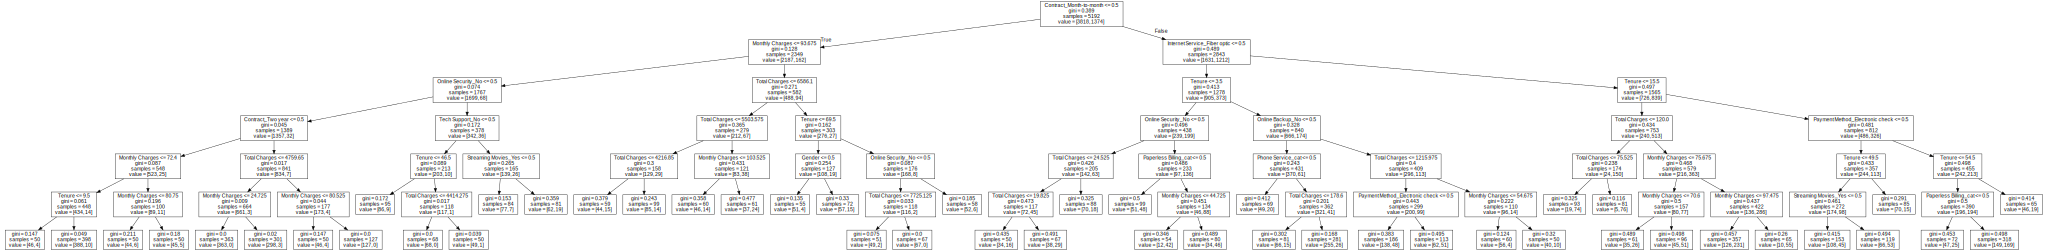

In [ ]:
from graphviz import Source   
Source.from_file('tree')

In [ ]:
feature_importance = dt_best.feature_importances_

l = len(features)
for i in range(0,len(features)):
    print('{:.<20} {:3}'.format(features[i],feature_importance[i]))

Gender.............. 0.001751524074757415
Senior Citizen...... 0.0
Tenure.............. 0.16506229167219372
Monthly Charges..... 0.05064622998843048
Total Charges....... 0.05866029525949445
Partner_cat......... 0.0
Dependents_cat...... 0.0
Phone Service_cat... 0.005520845970964399
Paperless Billing_cat 0.011223690969706766
Multiple Lines_No... 0.0
Multiple Lines_No phone service 0.0
Multiple Lines_Yes.. 0.0
Internet Service_DSL 0.0
Internet Service_Fiber optic 0.12819414585739072
Internet Service_No. 0.0
Online Security_No.. 0.031064886356833972
Online Security_No internet service 0.0
Online Security_Yes. 0.0
Online Backup_No.... 0.011640190465180365
Online Backup_No internet service 0.0
Online Backup_Yes... 0.0
Device Protection_No 0.0
Device Protection_No internet service 0.0
Device Protection_Yes 0.0
Tech Support_No..... 0.003475870691732249
Tech Support_No internet service 0.0
Tech Support_Yes.... 0.0
Streaming TV_No..... 0.0
Streaming TV_No internet service 0.0
Streaming TV_Yes...

In [ ]:
from sklearn.tree import _tree

def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 3)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 3)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if "
        
        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " then "
        if class_names is None:
            rule += "response: "+str(np.round(path[-1][0][0][0],3))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),2)}%)"
        rule += f" | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules

In [ ]:
rules = get_rules(dt_best, features, label)
for r in rules:
    print(r)

if (Contract_Month-to-month <= 0.5) and (Monthly Charges <= 93.675) and (Online Security_No <= 0.5) and (Contract_Two year <= 0.5) and (Monthly Charges <= 72.4) and (Tenure > 9.5) then class: 0 (proba: 97.49%) | based on 398 samples
if (Contract_Month-to-month <= 0.5) and (Monthly Charges <= 93.675) and (Online Security_No <= 0.5) and (Contract_Two year > 0.5) and (Total Charges <= 4759.65) and (Monthly Charges <= 24.725) then class: 0 (proba: 100.0%) | based on 363 samples
if (Contract_Month-to-month > 0.5) and (Internet Service_Fiber optic > 0.5) and (Tenure <= 15.5) and (Total Charges > 120.0) and (Monthly Charges > 75.675) and (Monthly Charges <= 97.475) then class: 0 (proba: 64.71%) | based on 357 samples
if (Contract_Month-to-month > 0.5) and (Internet Service_Fiber optic > 0.5) and (Tenure > 15.5) and (Payment Method_Electronic check > 0.5) and (Tenure <= 54.5) and (Paperless Billing_cat > 0.5) then class: 0 (proba: 53.14%) | based on 318 samples
if (Contract_Month-to-month <= 0

### **Results**
80% of data samples are used for training and rest 20% for testing. The findings indicate that **'Contract'** and **'Tenure'** are the first two most significant variables influencing a customer's churn decision.  
Also,  **80%** **prediction accuracy** is obtained on test data. \\
Additionally, decision rules for predicting a customer's churn decision are obtained and are as the following: 

```
# if (Contract_Month-to-month <= 0.5) and (Monthly Charges <= 93.675) and (Online Security_No <= 0.5) and (Contract_Two year <= 0.5) and 
(Monthly Charges <= 72.4) and (Total Charges > 41.8) then class: 0 (proba: 97.27%) | based on 440 samples. 
```
